# `00-setup` Notebook

Experiments with Neo4j and OSMnx.

* `00-setup` - Basic proof of concept, loading a OSMnx graph into Neo4j via GeoDataFrame

## TODO: 
    - [ ] create basic OSMnx graph
    - [ ] simplify network (intersections)
    - [ ] enrich with speed / travel time
    - [ ] enrich with elevation (Google elev API)
    - [ ] convert to GeoDataFrame
    - [ ] load GeoDataFrame into Neo4j

In [1]:
import osmnx as ox

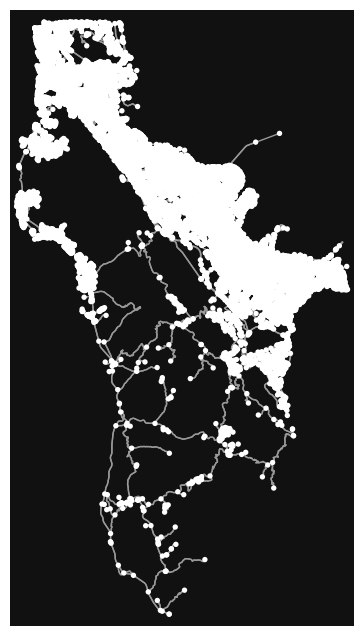

In [2]:
G = ox.graph_from_place("San Mateo, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

In [6]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)

In [7]:
gdf_nodes.head()

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
281266,37.560184,-122.302578,414B,motorway_junction,3,POINT (-122.30258 37.56018)
26028129,37.481955,-122.177346,406,motorway_junction,3,POINT (-122.17735 37.48195)
26028133,37.483360,-122.180471,NaN,NaN,3,POINT (-122.18047 37.48336)
26029745,37.484536,-122.184170,NaN,NaN,3,POINT (-122.18417 37.48454)
26029880,37.541234,-122.284735,414A,motorway_junction,3,POINT (-122.28473 37.54123)


In [8]:
gdf_relationships.head()

osmid  oneway  \
u        v         key                                                       
281266   702274215 0                                      24054675    True   
         65358141  0                          [512386104, 8920615]    True   
26028129 65388878  0    [385243928, 392651465, 679545026, 8924237]    True   
         26028133  0                                     395436903    True   
26028133 26029745  0                                     395436903    True   

                               lanes     ref              name        highway  \
u        v         key                                                          
281266   702274215 0               4  US 101  Bayshore Freeway       motorway   
         65358141  0               3     NaN               NaN  motorway_link   
26028129 65388878  0    [2, 1, 3, 4]     NaN               NaN  motorway_link   
         26028133  0               4  US 101  Bayshore Freeway       motorway   
26028133 26029745  0               4  US 101  Bayshore Freeway       motorway   

                       maxspeed reversed    length  \
u        v         key                               
281266   702274215 0     65 mph    False  1327.778   
         65358141  0     65 mph    False   321.491   
26028129 65388878  0     45 mph    False   377.841   
         26028133  0     65 mph    False   317.275   
26028133 26029745  0     65 mph    False   351.773   

                                                                 geometry  \
u        v         key                                                      
281266   702274215 0    LINESTRING (-122.30258 37.56018, -122.30222 37...   
         65358141  0    LINESTRING (-122.30258 37.56018, -122.30161 37...   
26028129 65388878  0    LINESTRING (-122.17735 37.48195, -122.17752 37...   
         26028133  0    LINESTRING (-122.17735 37.48195, -122.17744 37...   
26028133 26029745  0    LINESTRING (-122.18047 37.48336, -122.18184 37...   

                       bridge junction access tunnel  
u        v         key                                
281266   702274215 0      NaN      NaN    NaN    NaN  
         65358141  0      NaN      NaN    NaN    NaN  
26028129 65388878  0      NaN      NaN    NaN    NaN  
         26028133  0      NaN      NaN    NaN    NaN  
26028133 26029745  0      NaN      NaN    NaN    NaN

In [9]:
# TODO: create arrows model
# TODO: basic functions for batching over a dataframe (see daylight graph notebook)


![](../img/data_model.png)